In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Load data
#define header
col=['City','Date','PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']

#define number of columns from csv
use=list(np.arange(len(col)))

#read the data from csv
df=pd.read_csv("cityDay.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN


In [ ]:
df.dtypes

City        object
Date        object
PM2.5      float64
PM10       float64
NO         float64
NO2        float64
NOx        float64
NH3        float64
CO         float64
SO2        float64
O3         float64
Benzene    float64
Toluene    float64
Xylene     float64
AQI        float64
dtype: object

In [ ]:
df.shape

(29531, 15)

In [ ]:
#drop end rows with NaN values
df.dropna(how='all',inplace=True)
#drop NAN rows
df.dropna(thresh=10,axis=0,inplace=True)

# Calculate median of each column
median_values = df.median()

# Replace NaN values with median of respective column
df.fillna(median_values, inplace=True)

<ipython-input-5-75e9eeba7f4a>:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df.median()


In [ ]:
df.shape

(25491, 15)

In [ ]:
# convert "Date" column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# create new columns for day, month, and year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Day,Month,Year
0,Ahmedabad,2015-01-01,48.55,95.08,0.92,18.22,17.15,16.16,0.92,27.64,133.36,0.00,0.02,0.00,118.0,1,1,2015
1,Ahmedabad,2015-01-02,48.55,95.08,0.97,15.69,16.46,16.16,0.97,24.55,34.06,3.68,5.50,3.77,118.0,2,1,2015
2,Ahmedabad,2015-01-03,48.55,95.08,17.40,19.30,29.70,16.16,17.40,29.07,30.70,6.80,16.40,2.25,118.0,3,1,2015
3,Ahmedabad,2015-01-04,48.55,95.08,1.70,18.48,17.97,16.16,1.70,18.59,36.08,4.43,10.14,1.00,118.0,4,1,2015
4,Ahmedabad,2015-01-05,48.55,95.08,22.10,21.42,37.76,16.16,22.10,39.33,39.31,7.01,18.89,2.78,118.0,5,1,2015


In [ ]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
Day        0
Month      0
Year       0
dtype: int64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Day,Month,Year
0,Ahmedabad,01-01-2015,48.55,95.08,0.92,18.22,17.15,16.16,0.92,27.64,133.36,0.00,0.02,0.00,118.0,1,1,2015
1,Ahmedabad,01-02-2015,48.55,95.08,0.97,15.69,16.46,16.16,0.97,24.55,34.06,3.68,5.50,3.77,118.0,2,1,2015
2,Ahmedabad,01-03-2015,48.55,95.08,17.40,19.30,29.70,16.16,17.40,29.07,30.70,6.80,16.40,2.25,118.0,3,1,2015
3,Ahmedabad,01-04-2015,48.55,95.08,1.70,18.48,17.97,16.16,1.70,18.59,36.08,4.43,10.14,1.00,118.0,4,1,2015
4,Ahmedabad,01-05-2015,48.55,95.08,22.10,21.42,37.76,16.16,22.10,39.33,39.31,7.01,18.89,2.78,118.0,5,1,2015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25491 entries, 0 to 29530
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     25491 non-null  object 
 1   Date     25491 non-null  object 
 2   PM2.5    25491 non-null  float64
 3   PM10     25491 non-null  float64
 4   NO       25491 non-null  float64
 5   NO2      25491 non-null  float64
 6   NOx      25491 non-null  float64
 7   NH3      25491 non-null  float64
 8   CO       25491 non-null  float64
 9   SO2      25491 non-null  float64
 10  O3       25491 non-null  float64
 11  Benzene  25491 non-null  float64
 12  Toluene  25491 non-null  float64
 13  Xylene   25491 non-null  float64
 14  AQI      25491 non-null  float64
 15  Day      25491 non-null  int64  
 16  Month    25491 non-null  int64  
 17  Year     25491 non-null  int64  
dtypes: float64(13), int64(3), object(2)
memory usage: 3.7+ MB


<ipython-input-11-739884d3452f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

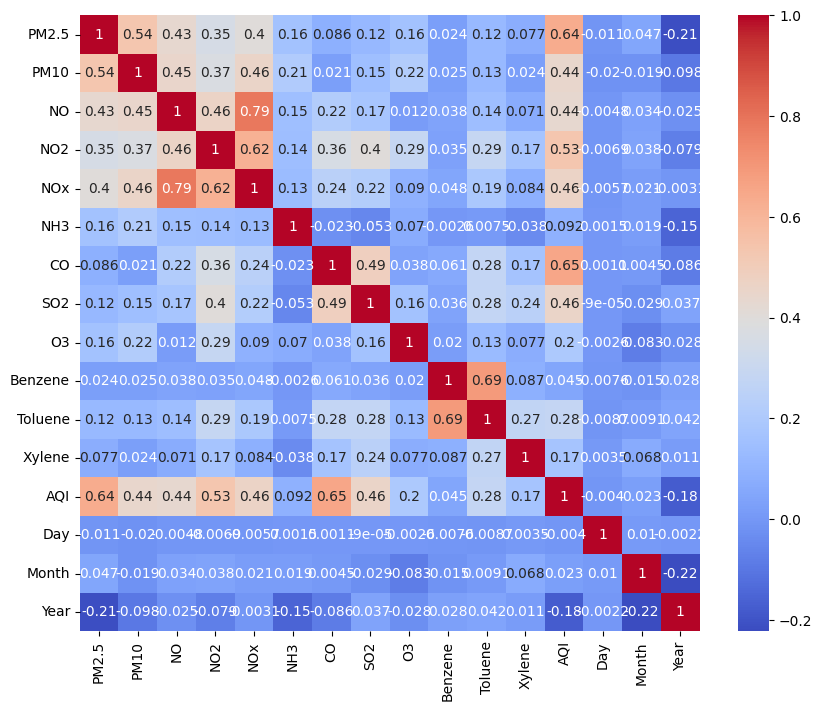

In [ ]:
# calculate correlation matrix
corr_matrix = df.corr()
# plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
cols_to_exclude = ['Date', 'City']
df = df.drop(cols_to_exclude, axis=1)

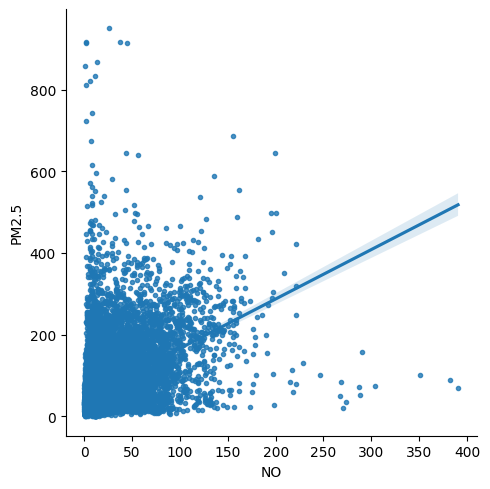

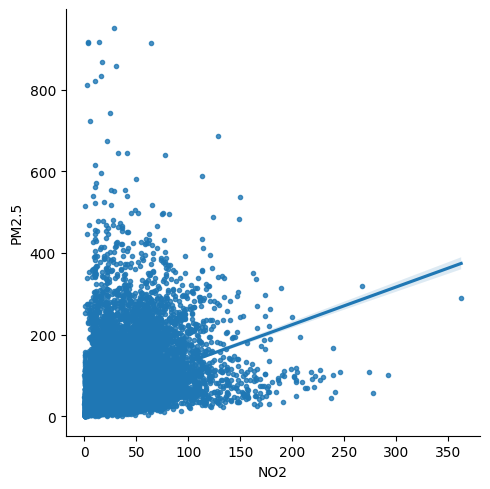

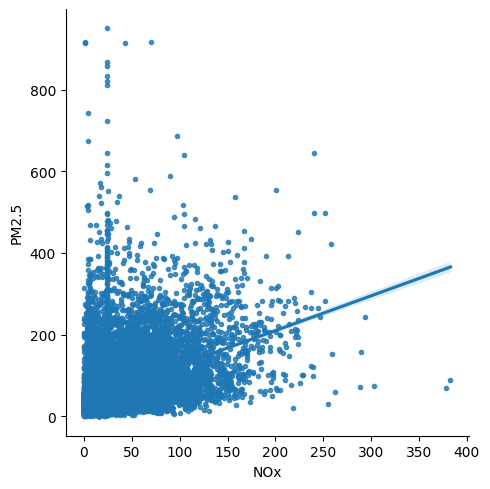

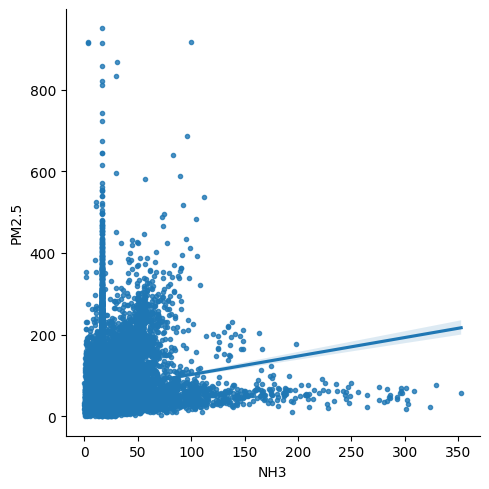

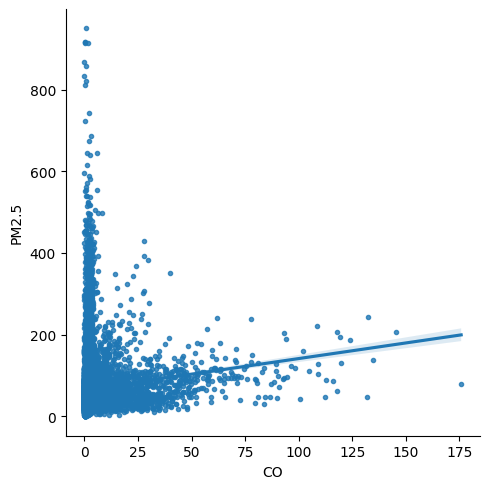

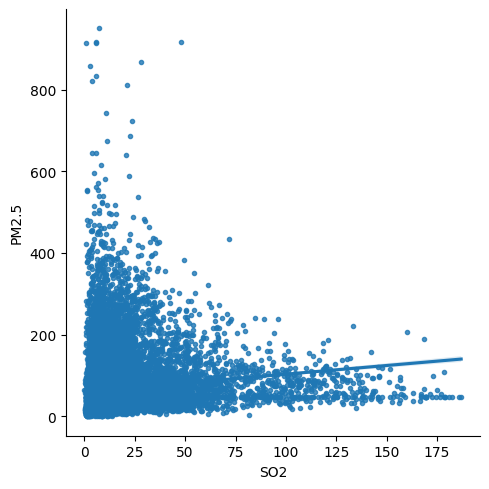

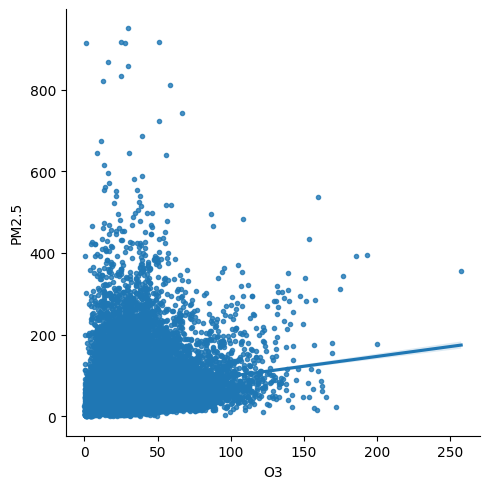

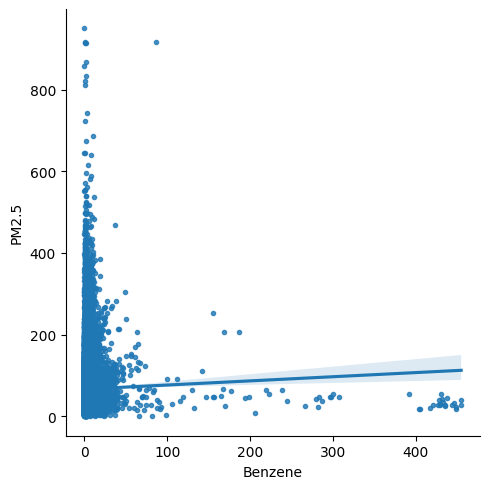

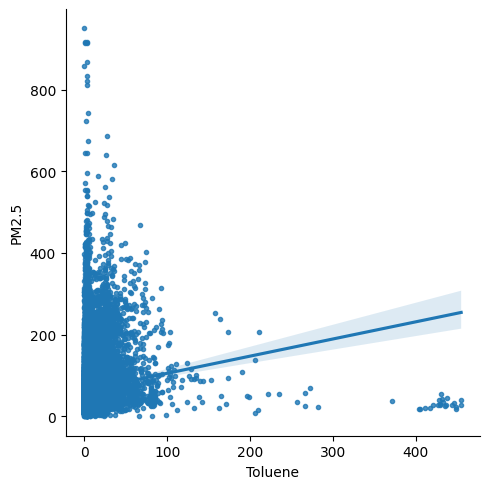

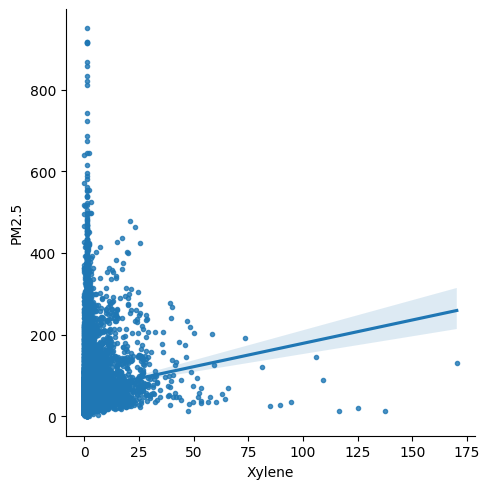

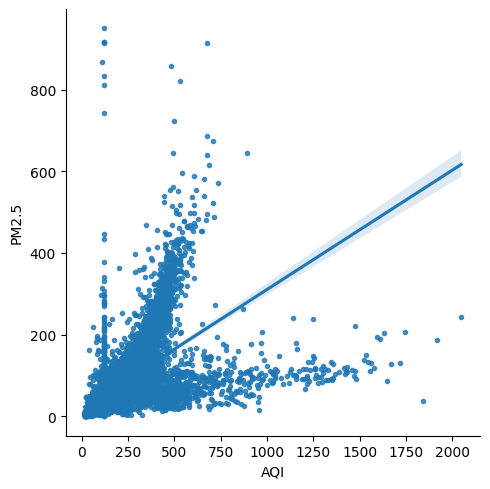

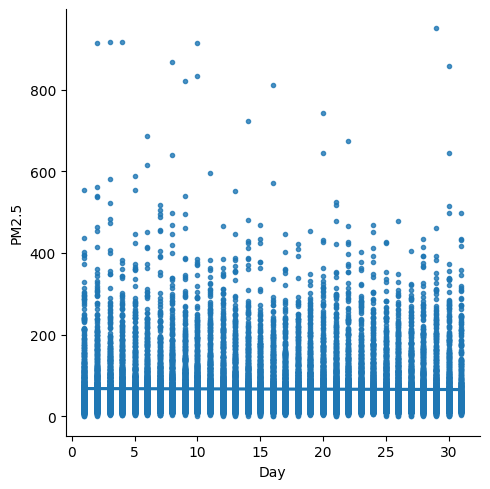

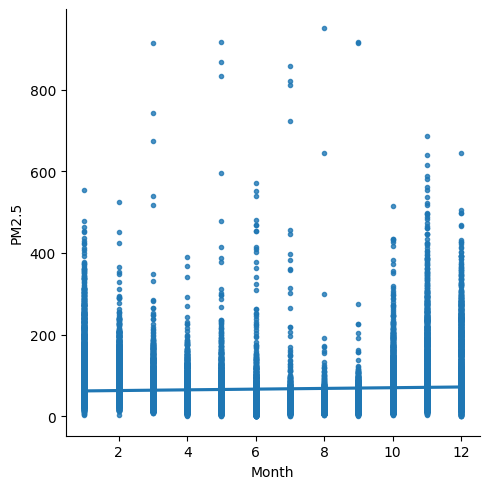

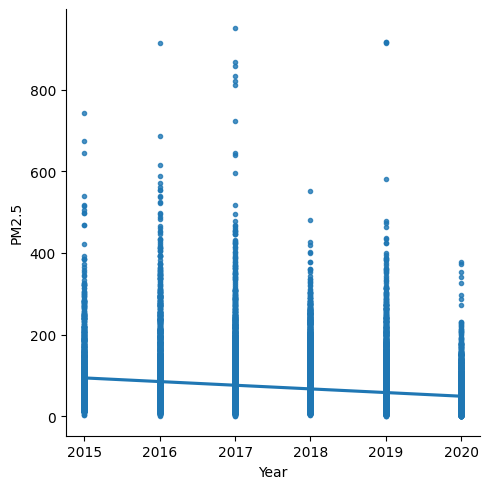

In [ ]:
##plot all X-features against output variable PM2.5
col_=df.columns.tolist()[2:]
for i in df.columns.tolist()[2:]:
    sns.lmplot(x=i,y='PM2.5',data=df,markers='.')

In [ ]:
# select the X features and y target variable
X = df.drop(columns=['PM2.5'])
y = df['PM2.5']

# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#**Random Forest Regression**

In [ ]:
# Initialize the random forest regressor with 100 trees
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the regressor to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 703.1356152519143
Root Mean Squared Error: 26.51670445684973
Mean Absolute Error: 11.174813237889783
R-squared: 0.8194449616651531


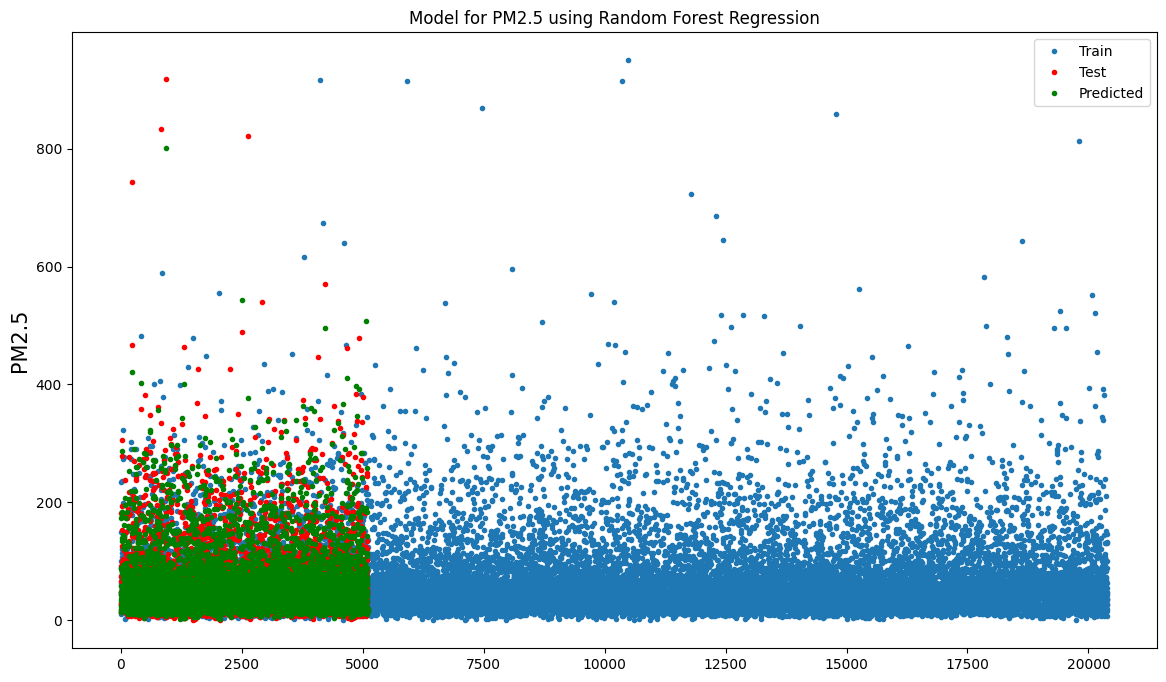

In [ ]:
# Plot actual and predicted values for Random Forest
plt.figure(figsize=(14,8))
plt.title("Model for PM2.5 using Random Forest Regression")
#plt.xlabel("Date", fontsize = 15)
plt.ylabel("PM2.5",fontsize=15)
plt.plot(y_train.values,'.', label='Train')
plt.plot(y_test.values, 'r.',label='Test')
plt.plot(y_pred,'g.', label='Predicted')
plt.legend()
plt.show()

#**Decision Tree Regression**

In [ ]:
# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor to the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_regressor.predict(X_test)

# Evaluate the performance of the model using different metrics

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 1355.065715179447
Root Mean Squared Error: 36.81121724664164
Mean Absolute Error: 15.909042949597962
R-squared: 0.6520387577539997


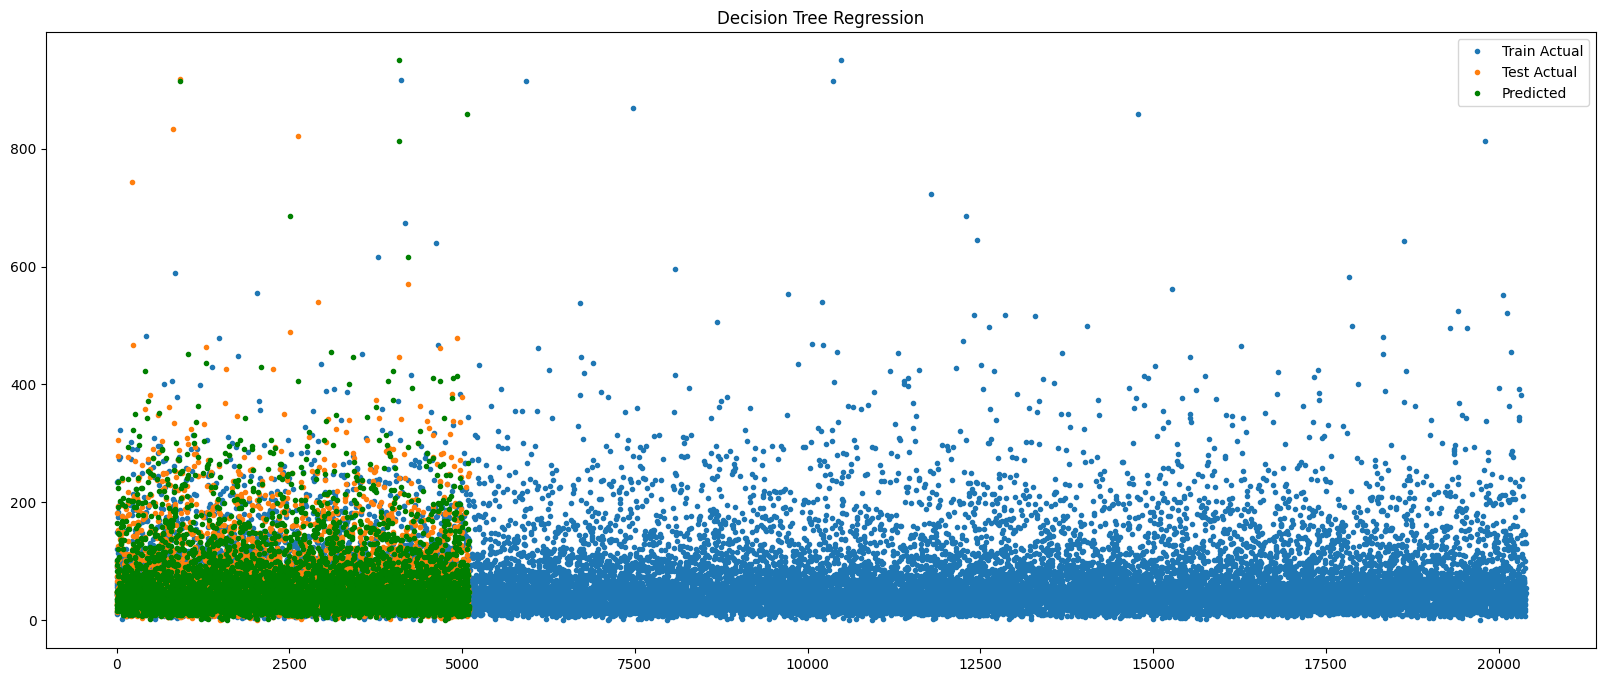

In [ ]:
# Plot actual and predicted values for Decision Tree
plt.figure(figsize=(20,8))
plt.plot(y_train.values, '.', label='Train Actual')
plt.plot(y_test.values,'.', label='Test Actual')
plt.plot(y_pred,'g.', label='Predicted')
plt.legend()
plt.title('Decision Tree Regression')
#plt.xlabel("Date", fontsize = 15)
plt.show()

#**Elastic Net Regression**

In [ ]:
# select the X features and y target variable
#X = df.drop(columns=['PM2.5','Date','City'])
#y = df['PM2.5']

# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ain, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Elastic Net regression model
model = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
model.fit(X_train, y_train)

# Evaluate the model on test set
#y_pred = model.predict(X_test)
# Predict PM2.5 for training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Print the MSE and R-squared values for the training and testing sets
print('MSE train:', mean_squared_error(y_train, y_train_pred))
print('MSE test:', mean_squared_error(y_test, y_test_pred))
print('R^2 train:', r2_score(y_train, y_train_pred))
print('R^2 test:', r2_score(y_test, y_test_pred))

MSE train: 1486.3259194512973
MSE test: 1483.1143509893157
R^2 train: 0.6352488379158892
R^2 test: 0.6191577233619465


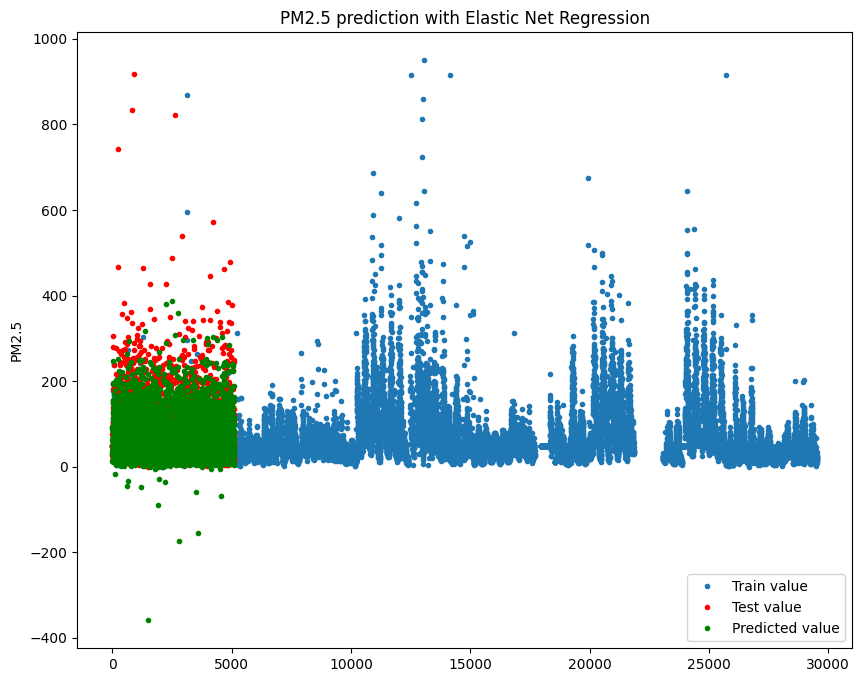

In [ ]:
plt.plot(y_train, '.', label='Train value')
plt.plot(y_test.values, 'r.', label='Test value')
plt.plot(y_test_pred, 'g.', label='Predicted value')
plt.legend()
plt.title('PM2.5 prediction with Elastic Net Regression')

plt.ylabel('PM2.5')
plt.show()

#**Lasso Regression**

In [ ]:
# select the X features and y target variable
#X = df.drop(columns=['PM2.5','Date','City'])
#y = df['PM2.5']

# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict PM2.5 for training and testing data
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calculate mean squared error for training and testing data
# Print the MSE and R-squared values for the training and testing sets
print('MSE train:', mean_squared_error(y_train, y_train_pred))
print('MSE test:', mean_squared_error(y_test, y_test_pred))
print('R^2 train:', r2_score(y_train, y_train_pred))
print('R^2 test:', r2_score(y_test, y_test_pred))



MSE train: 1486.3060856417749
MSE test: 1483.2679882926093
R^2 train: 0.635253705223239
R^2 test: 0.6191182715284963


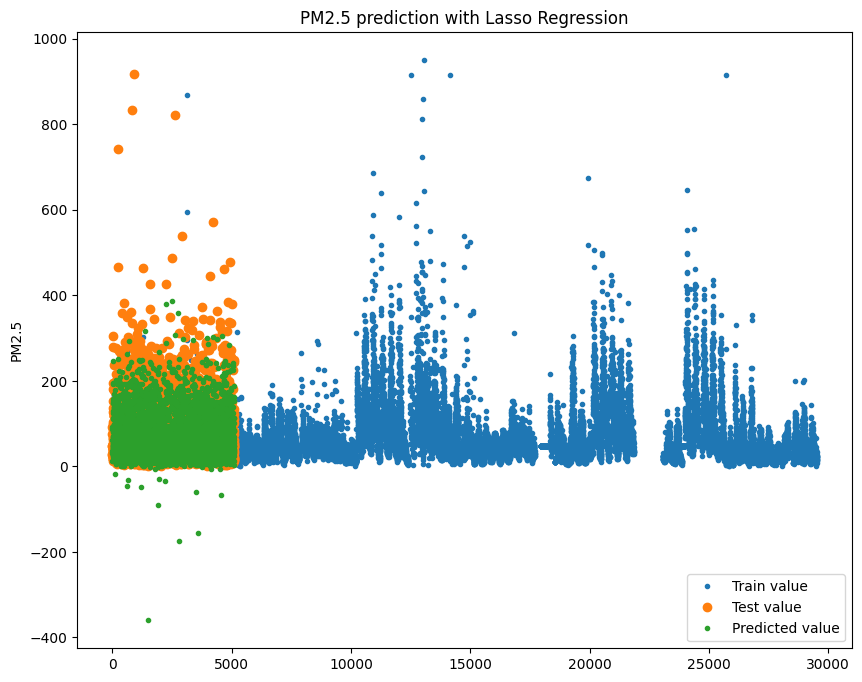

In [ ]:
# Plot results

plt.plot(y_train, '.', label='Train value')
plt.plot(y_test.values, 'o', label='Test value')
plt.plot(y_test_pred, '.', label='Predicted value')
plt.legend()
plt.title('PM2.5 prediction with Lasso Regression')

plt.ylabel('PM2.5')
plt.show()

#**SVR**

MSE train: 2061.4710297582797
MSE test: 1999.986839657565
R^2 train: 0.49410560371264556
R^2 test: 0.4864323571859094


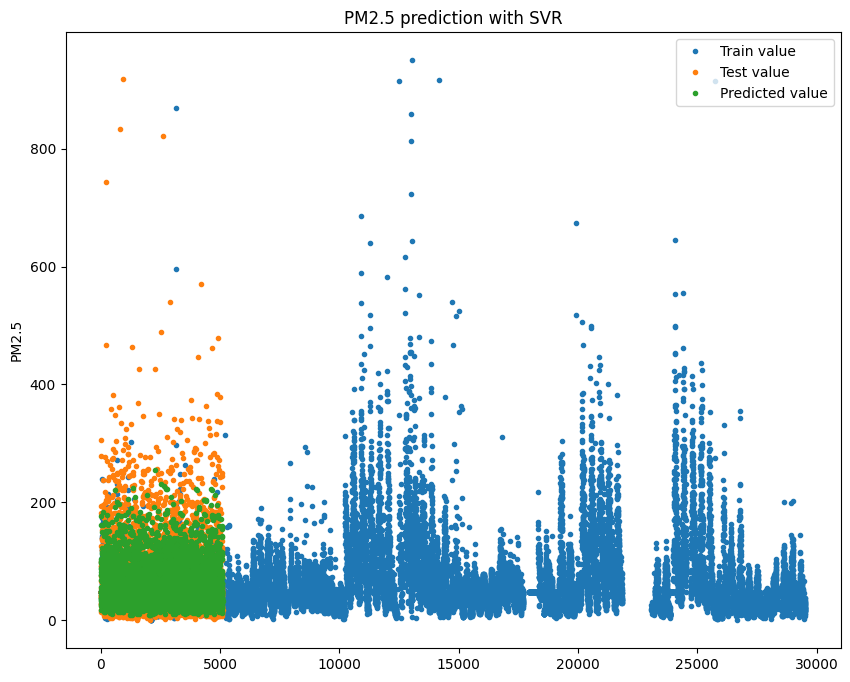

In [ ]:
# Extract the features and target variable
#X = df.drop(columns=['PM2.5','Date','City'])
#y = df['PM2.5']

# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVR model
regressor = SVR()
regressor.fit(X_train, y_train)

# Predict the values
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
# Print the MSE and R-squared values for the training and testing sets
print('MSE train:', mean_squared_error(y_train, y_pred_train))
print('MSE test:', mean_squared_error(y_test, y_pred_test))
print('R^2 train:', r2_score(y_train, y_pred_train))
print('R^2 test:', r2_score(y_test, y_pred_test))
#Plot the data
plt.plot(y_train, '.', label='Train value')
plt.plot(y_test.values, '.', label='Test value')
plt.plot(y_pred_test, '.', label='Predicted value')
plt.legend()
plt.title('PM2.5 prediction with SVR')

plt.ylabel('PM2.5')
plt.show()


#**Ridge Regression**

MSE train: 1486.299954854888
MSE test: 1483.3719907687603
R^2 train: 0.6352552097463131
R^2 test: 0.6190915651995023


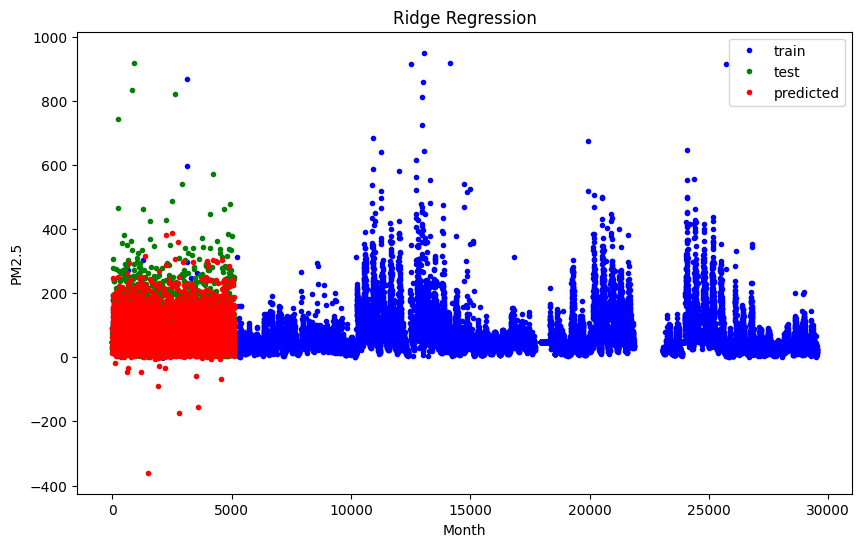

In [ ]:
# select the X features and y target variable
#X = df.drop(columns=['PM2.5','Date','City'])
#y = df['PM2.5']

# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge regression model
alpha = 1
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred_RR = model.predict(X_train)
y_test_pred_RR = model.predict(X_test)



# Print the MSE and R-squared values for the training and testing sets
print('MSE train:', mean_squared_error(y_train, y_train_pred_RR))
print('MSE test:', mean_squared_error(y_test, y_test_pred_RR))
print('R^2 train:', r2_score(y_train, y_train_pred_RR))
print('R^2 test:', r2_score(y_test, y_test_pred_RR))

# Plot train and test sets and predicted values
plt.figure(figsize=(10, 6))
plt.plot( y_train, 'b.', label='train')
plt.plot( y_test.values, 'g.', label='test')
plt.plot( y_test_pred_RR, 'r.', label='predicted')
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Ridge Regression')
plt.legend()
plt.show()

# Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

#Convert the 'Date' column to pandas datetime format
#df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column
#df['Month'] = df['Date'].dt.month

# Calculate the monthly average of 'PM2.5' column
#monthly_data = df.groupby('Month')['PM2.5'].mean().reset_index()

# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(monthly_data['Month'], monthly_data['PM2.5'], test_size=0.2, random_state=42)


# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size,:]
test_data = df.iloc[train_size:,:]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data[['PM2.5']])
test_data_scaled = scaler.transform(test_data[['PM2.5']])

# Convert the data into sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    X = np.array(X)
    y = np.array(y)
    return X, y

seq_length = 3
X_train, y_train = create_sequences(train_data_scaled, seq_length)
X_test, y_test = create_sequences(test_data_scaled, seq_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)




Epoch 1/100
638/638 [==============================] - 10s 8ms/step - loss: 0.0018
Epoch 2/100
638/638 [==============================] - 6s 9ms/step - loss: 0.0014
Epoch 3/100
638/638 [==============================] - 5s 8ms/step - loss: 0.0014
Epoch 4/100
638/638 [==============================] - 5s 8ms/step - loss: 0.0014
Epoch 5/100
638/638 [==============================] - 6s 9ms/step - loss: 0.0014
Epoch 6/100
638/638 [==============================] - 5s 8ms/step - loss: 0.0014
Epoch 7/100
638/638 [==============================] - 6s 9ms/step - loss: 0.0014
Epoch 8/100
638/638 [==============================] - 5s 8ms/step - loss: 0.0014
Epoch 9/100
638/638 [==============================] - 5s 8ms/step - loss: 0.0013
Epoch 10/100
638/638 [==============================] - 6s 9ms/step - loss: 0.0013
Epoch 11/100
638/638 [==============================] - 5s 8ms/step - loss: 0.0013
Epoch 12/100
638/638 [==============================] - 6s 9ms/step - loss: 0.0013
Epoch 13/100

In [ ]:
# Print the MSE and R-squared values for the training and testing sets
#print('MSE train:', mean_squared_error(y_train, y_train_pred))
print('MSE test:', mean_squared_error(y_test, y_pred))
#print('R^2 train:', r2_score(y_train, y_train_pred))
print('R^2 test:', r2_score(y_test, y_pred))

MSE test: 1043.4142741625863
R^2 test: 0.7968954985928596


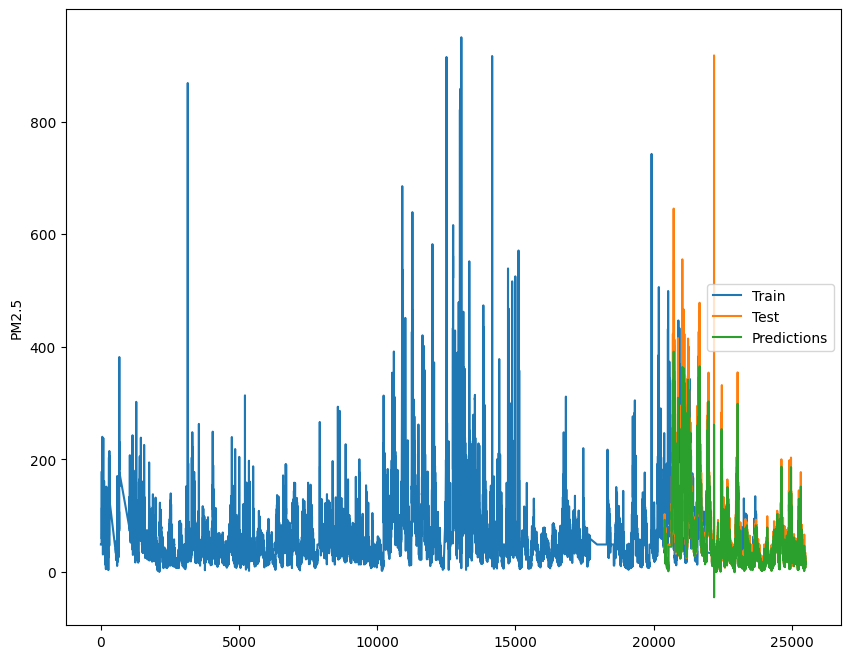

In [ ]:
# Plot the results
plt.plot(train_data['PM2.5'])
plt.plot(range(train_size, len(df)), test_data['PM2.5'])
plt.plot(range(train_size+seq_length, len(df)), y_pred)
plt.ylabel('PM2.5')
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()

#Comparison Study

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tabulate import tabulate
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor

# Extract the features and target variable
X = df.drop(columns=['PM2.5'])
y = df['PM2.5']

# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)



# Initialize the regression models
svc = SVR()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()
nn = MLPRegressor()

# Train the regression models
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic.fit(X_train, y_train)
nn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_elastic = elastic.predict(X_test)
y_pred_nn = nn.predict(X_test)

# Compute the R-squared score for each model
r2_svc = r2_score(y_test, y_pred_svc)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_elastic = r2_score(y_test, y_pred_elastic)
r2_nn = r2_score(y_test, y_pred_nn)

# Plot the scores
models = ['SVR', 'Random Forest', 'Decision Tree', 'Lasso', 'Ridge', 'Elastic Net', 'Neural Network']
scores = [r2_svc, r2_rf, r2_dt, r2_lasso, r2_ridge, r2_elastic, r2_nn]
table = list(zip(models, scores))
headers = ["Model", "R2 Score"]

print(tabulate(table, headers=headers))

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model             R2 Score
--------------  ----------
SVR               0.486432
Random Forest     0.81914
Decision Tree     0.666532
Lasso             0.619227
Ridge             0.619092
Elastic Net       0.619238
Neural Network    0.789077


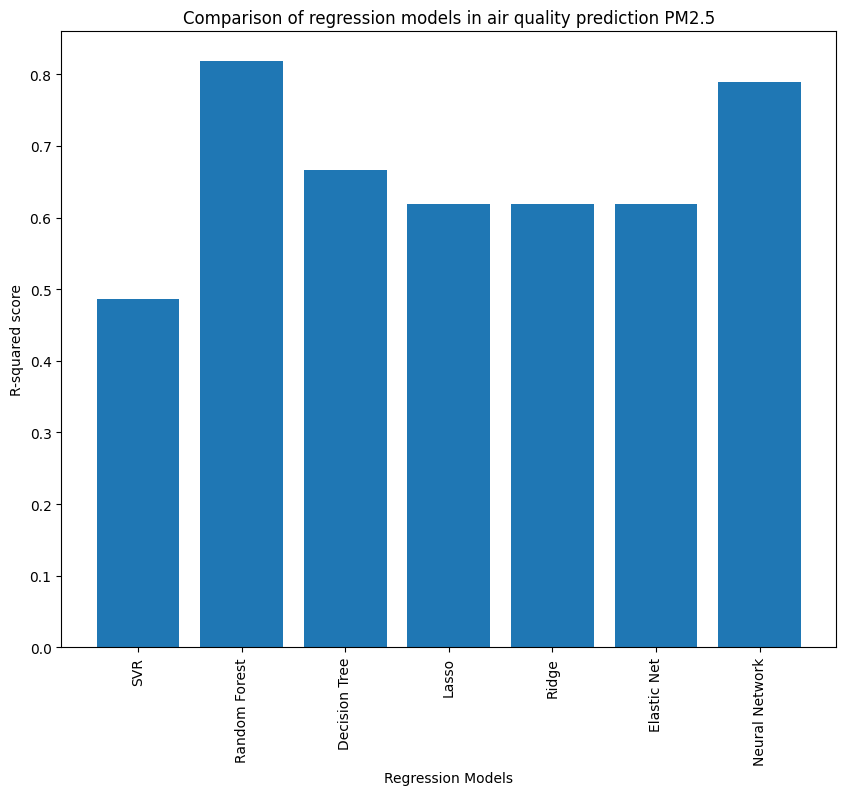

In [ ]:
plt.xticks(rotation=90);
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('R-squared score')
plt.title('Comparison of regression models in air quality prediction PM2.5')
plt.show()

**END**